In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

def download_stock(sym, start_date, end_date):
    stock = yf.download(sym, start_date, end_date)
    return stock


print(download_stock('AAPL', '2020-01-01', '2020-12-31').head())


[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                                        
2020-01-02  72.796013  75.087502  75.150002  73.797501  74.059998  135480400
2020-01-03  72.088295  74.357498  75.144997  74.125000  74.287498  146322800
2020-01-06  72.662720  74.949997  74.989998  73.187500  73.447502  118387200
2020-01-07  72.320984  74.597504  75.224998  74.370003  74.959999  108872000
2020-01-08  73.484344  75.797501  76.110001  74.290001  74.290001  132079200


<ipython-input-32-376d5828800c>:47: RuntimeWarning: invalid value encountered in scalar divide
  scaled_data[x] = scaled_data[x] / x


라디안: [       nan 0.78539816 0.58707578 0.48807368 0.3855411  0.29131625
 0.19135968],
 도: [        nan 45.         33.63696458 27.96456202 22.08987788 16.69119169
 10.96410177]


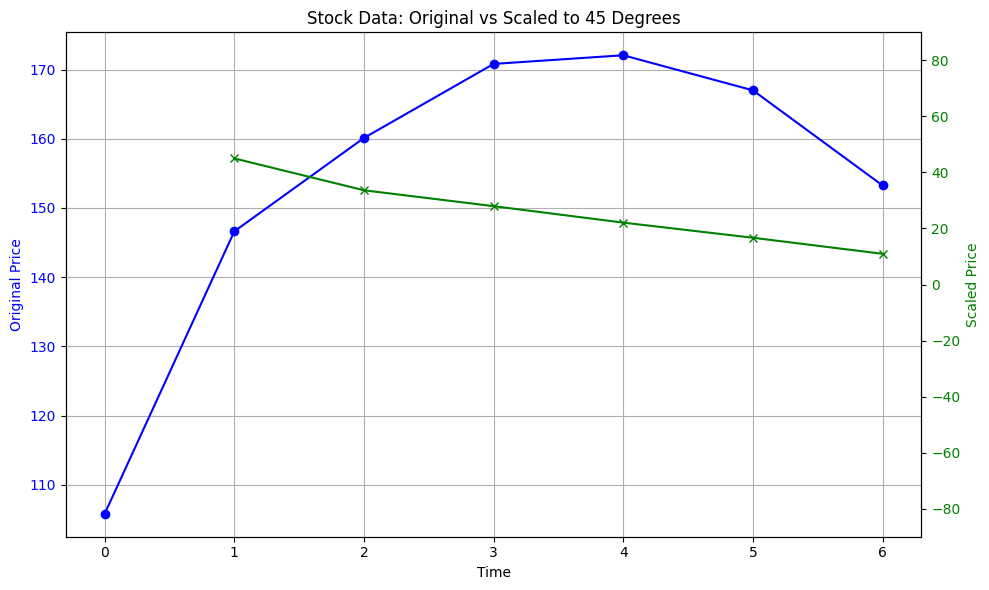

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def scale_to_45_degree(stock_data, start_point=0):
    """
    Scale stock data such that the first segment starts at the given point and follows a 45-degree incline.

    Parameters:
        stock_data (list or numpy array): Original stock prices.
        start_point (int): Index of the starting point in the stock data.

    Returns:
        scaled_data (numpy array): Scaled stock prices.
        time_axis (numpy array): Time axis for the scaled data.
    """
    if start_point < 0 or start_point >= len(stock_data):
        raise ValueError("Invalid start point.")

    # Create a time axis
    time_axis = np.arange(len(stock_data))

    # Initialize scaled prices with the first point set to 0
    scaled_prices = [0]

    # Calculate scaling factor for 45 degrees
    first_diff = stock_data[1] - stock_data[0]
    scaling_factor = abs(first_diff)

    # Scale the rest of the data based on the first difference
    for i in range(1, len(stock_data)):
        diff = stock_data[i] - stock_data[i - 1]
        scaled_prices.append(scaled_prices[-1] + diff / scaling_factor)

    return np.array(scaled_prices), time_axis

# Example usage
if __name__ == "__main__":
    # Sample stock data (replace this with your data)
    stock_data = [ 105.808361, 146.617615, 160.111501, 170.807258,
        172.058449, 166.990985, 153.244264
    ]

    # Scale stock data to 45 degrees
    scaled_data, time_axis = scale_to_45_degree(stock_data)

    for x in range(len(scaled_data)):
      scaled_data[x] = scaled_data[x] / x

    # 예제 데이터
    scaled_data = scaled_data
    angle_in_radians = np.arctan(scaled_data)  # 역탄젠트 계산
    angle_in_degrees = np.degrees(angle_in_radians)  # 각도를 도(degree)로 변환

    print(f"라디안: {angle_in_radians},\n 도: {angle_in_degrees}")

    # Plot the original and scaled data
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot original stock data
    ax.plot(time_axis, stock_data, label="Original Stock Data", marker="o", color="blue")
    ax.set_xlabel("Time")
    ax.set_ylabel("Original Price", color="blue")
    ax.tick_params(axis='y', labelcolor="blue")
    ax.grid()

    # Plot scaled data on the secondary y-axis
    ax1 = ax.twinx()
    ax1.plot(time_axis, angle_in_degrees, label="Scaled to 45 Degrees", marker="x", color="green")
    ax1.set_ylabel("Scaled Price", color="green")
    ax1.tick_params(axis='y', labelcolor="green")
    # Set y-axis limit to [-90, 90]
    ax1.set_ylim(-90, 90)
    # Add a title and legends
    plt.title("Stock Data: Original vs Scaled to 45 Degrees")
    fig.tight_layout()
    plt.show()


In [ ]:
scaled_data

array([ 0. ,  1. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. ])

In [ ]:
for x in range(len(scaled_data)):
  scaled_data[x] = scaled_data[x] / x

<ipython-input-19-8fbb7fa4983a>:2: RuntimeWarning: invalid value encountered in scalar divide
  scaled_data[x] = scaled_data[x] / x


In [ ]:
scaled_data

array([       nan, 1.        , 1.25      , 1.66666667, 1.875     ,
       2.        , 2.08333333, 2.14285714])

In [ ]:
import numpy as np

# 예제 데이터
scaled_data = scaled_data
angle_in_radians = np.arctan(scaled_data)  # 역탄젠트 계산
angle_in_degrees = np.degrees(angle_in_radians)  # 각도를 도(degree)로 변환

print(f"라디안: {angle_in_radians},\n 도: {angle_in_degrees}")

라디안: [       nan 0.78539816 0.89605538 1.03037683 1.080839   1.10714872
 1.12327635 1.13416917],
 도: [        nan 45.         51.34019175 59.03624347 61.92751306 63.43494882
 64.35899418 64.98310652]
